<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


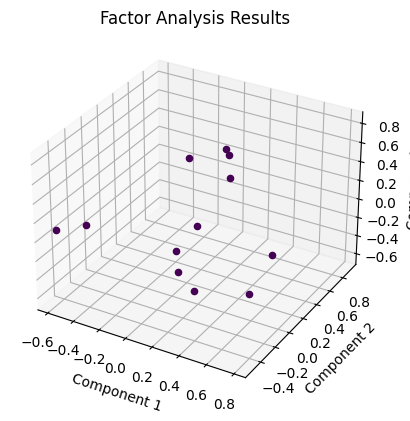

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load factor analysis results from CSV
factor_analysis_results = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/factor.csv")

# Extract factor names and variable names
factor_names = list(factor_analysis_results.iloc[0, 1:])  # Exclude the first cell
variable_names = list(factor_analysis_results.iloc[1:, 0])  # Exclude the first cell and header

# Select factor values and variable scores
factor_values = factor_analysis_results.iloc[0, 1:].astype(float)  # Exclude the first cell
variable_scores = factor_analysis_results.iloc[1:, 1:].astype(float)  # Exclude the first cell and header

# Calculate mean factor value for color assignment
mean_factor_value = np.mean(factor_values)

# Scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, variable in enumerate(variable_names):
    ax.scatter(variable_scores.iloc[i, 0], variable_scores.iloc[i, 1], variable_scores.iloc[i, 2],
               c=mean_factor_value, cmap='viridis')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.title('Factor Analysis Results')

# Display the plot
plt.show()


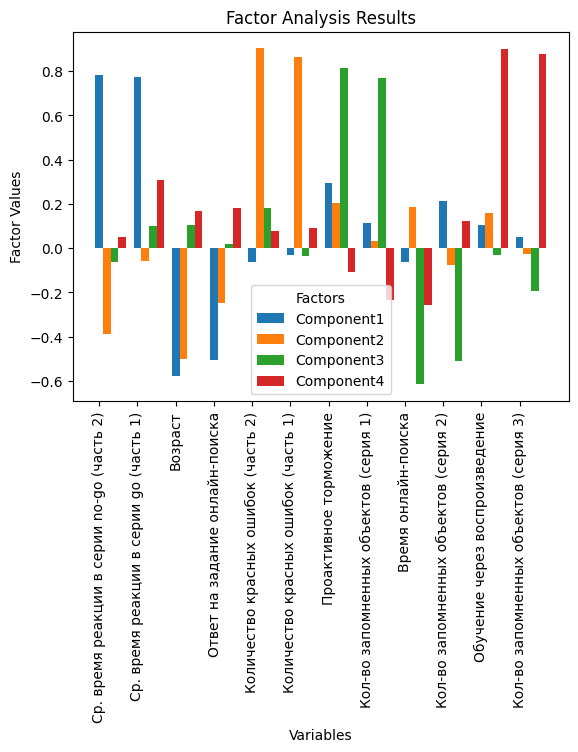

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load factor analysis results from CSV
factor_analysis_results = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/factor.csv")

# Extract factor names and variable names
factor_names = list(factor_analysis_results.columns[1:])  # Exclude the first cell
variable_names = list(factor_analysis_results.iloc[1:, 0])  # Exclude the first cell and header

# Select factor values and variable scores
factor_values = factor_analysis_results.iloc[1:, 1:].astype(float)  # Exclude the first cell and header

# Bar plot
fig, ax = plt.subplots()
x = np.arange(len(variable_names))
width = 0.2

for i, factor in enumerate(factor_names):
    ax.bar(x + i * width, factor_values.iloc[:, i], width, label=factor)

ax.set_xticks(x)
ax.set_xticklabels(variable_names, rotation=90)
ax.set_xlabel('Variables')
ax.set_ylabel('Factor Values')
ax.legend(title='Factors')

plt.title('Factor Analysis Results')

# Display the plot
plt.show()


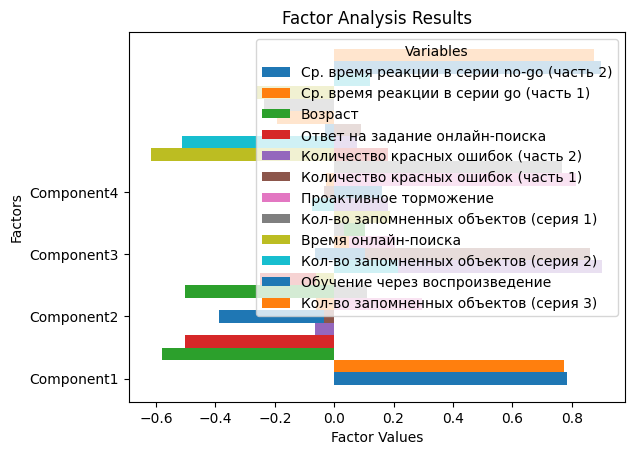

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load factor analysis results from CSV
factor_analysis_results = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/factor.csv")

# Extract factor names and variable names
factor_names = list(factor_analysis_results.columns[1:])  # Exclude the first cell
variable_names = list(factor_analysis_results.iloc[1:, 0])  # Exclude the first cell and header

# Select factor values and variable scores
factor_values = factor_analysis_results.iloc[1:, 1:].astype(float)  # Exclude the first cell and header

# Bar plot
fig, ax = plt.subplots()
x = np.arange(len(factor_names))
width = 0.2

for i, variable in enumerate(variable_names):
    ax.barh(x + i * width, factor_values.iloc[i, :], height=width, label=variable)

ax.set_yticks(x)
ax.set_yticklabels(factor_names)
ax.set_ylabel('Factors')
ax.set_xlabel('Factor Values')
ax.legend(title='Variables')

plt.title('Factor Analysis Results')

# Display the plot
plt.show()


In [15]:
! pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


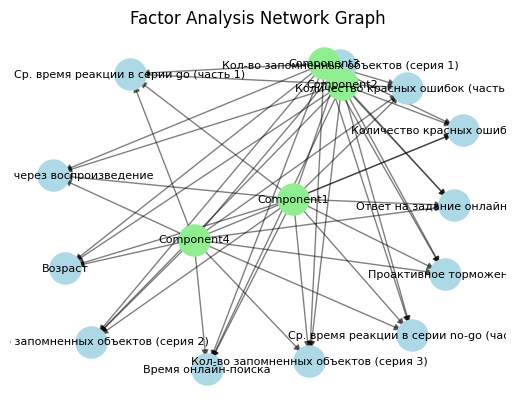

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load factor analysis results from CSV
factor_analysis_results = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/factor.csv")

# Extract factor names and variable names
factor_names = list(factor_analysis_results.columns[1:])  # Exclude the first cell
variable_names = list(factor_analysis_results.iloc[1:, 0])  # Exclude the first cell and header

# Select factor values
factor_values = factor_analysis_results.iloc[1:, 1:].astype(float)  # Exclude the first cell and header

# Create a directed graph
G = nx.DiGraph()

# Add nodes for variables
G.add_nodes_from(variable_names, bipartite=0)
# Add nodes for factors
G.add_nodes_from(factor_names, bipartite=1)

# Add edges between factors and variables
for factor_index, factor in enumerate(factor_names):
    for variable_index, variable in enumerate(variable_names):
        edge_weight = factor_values.iloc[variable_index, factor_index]
        G.add_edge(factor, variable, weight=edge_weight)

# Set layout for the graph
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=variable_names, node_color='lightblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=factor_names, node_color='lightgreen', node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)

# Draw labels
node_labels = {node: node for node in variable_names + factor_names}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

plt.axis('off')
plt.title('Factor Analysis Network Graph')

# Display the graph
plt.show()


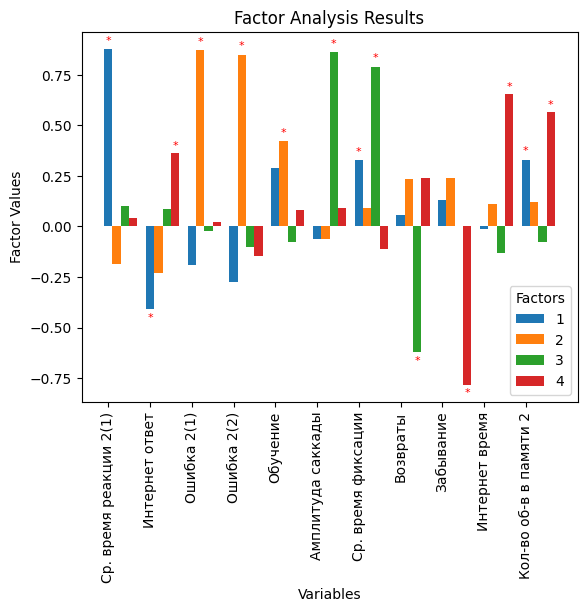

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load factor analysis results from CSV
factor_analysis_results = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/a.csv")

# Extract factor names and variable names
factor_names = list(factor_analysis_results.columns[1:])  # Exclude the first cell
variable_names = list(factor_analysis_results.iloc[1:, 0])  # Exclude the first cell and header

# Select factor values
factor_values = factor_analysis_results.iloc[1:, 1:].astype(float)  # Exclude the first cell and header

# Bar plot
fig, ax = plt.subplots()
width = 0.2

for i, factor in enumerate(factor_names):
    x = np.arange(len(variable_names)) + i * width
    y = factor_values.iloc[:, i]

    # Set marker for values based on threshold
    marker = np.where((y >= 0.3) | (y <= -0.3), '*', 'None')

    ax.bar(x, y, width, label=factor)
    for j, val in enumerate(y):
        if (val >= 0.3) or (val <= -0.3):
            peak = np.max(y)
            offset = 0.02 * peak
            if val <= -0.3:
                ax.text(x[j], val - offset, marker[j], ha='center', va='top', color='red', fontsize=8)
            else:
                ax.text(x[j], val + offset, marker[j], ha='center', va='bottom', color='red', fontsize=8)

ax.set_xticks(np.arange(len(variable_names)))
ax.set_xticklabels(variable_names, rotation=90)
ax.set_xlabel('Variables')
ax.set_ylabel('Factor Values')
ax.legend(title='Factors')

plt.title('Factor Analysis Results')

plt.show()


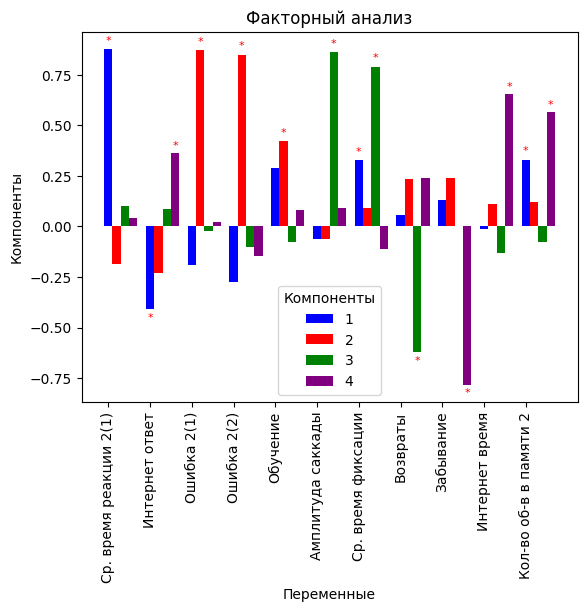

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load factor analysis results from CSV
factor_analysis_results = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/a.csv")

# Extract factor names and variable names
factor_names = list(factor_analysis_results.columns[1:])  # Exclude the first cell
variable_names = list(factor_analysis_results.iloc[1:, 0])  # Exclude the first cell and header

# Select factor values
factor_values = factor_analysis_results.iloc[1:, 1:].astype(float)  # Exclude the first cell and header

# Define a list of colors for the factors
factor_colors = ['blue', 'red', 'green', 'purple', 'orange']  # Add more colors if needed

# Bar plot
fig, ax = plt.subplots()
width = 0.2

for i, factor in enumerate(factor_names):
    x = np.arange(len(variable_names)) + i * width
    y = factor_values.iloc[:, i]

    # Set marker for values based on threshold
    marker = np.where((y >= 0.3) | (y <= -0.3), '*', 'None')

    # Get the color for the current factor
    color = factor_colors[i % len(factor_colors)]  # Use modulo to cycle through the colors

    ax.bar(x, y, width, label=factor, color=color)
    for j, val in enumerate(y):
        if (val >= 0.3) or (val <= -0.3):
            peak = np.max(y)
            offset = 0.02 * peak
            if val <= -0.3:
                ax.text(x[j], val - offset, marker[j], ha='center', va='top', color='red', fontsize=8)
            else:
                ax.text(x[j], val + offset, marker[j], ha='center', va='bottom', color='red', fontsize=8)

ax.set_xticks(np.arange(len(variable_names)))
ax.set_xticklabels(variable_names, rotation=90)
ax.set_xlabel('Переменные')
ax.set_ylabel('Компоненты')
ax.legend(title='Компоненты')

plt.title('Факторный анализ')

plt.show()
